# Multiple linear regression to predict the price of house

###### Here we have given so many parameter on which the price of house depends.

For linear regression the equation is f(x) = mx + c where m is slope and c is intercept.

Now for multiple regression our equation will be f(x) = m1*x1 + m2*x2 + ... + Mn*Xn + b.

where x1, x2, x3 .. are the different features for example :- "area","BHK", or "No. of bathroom".

we take parameter,  m = [ m1, m2, m3 ....] and "b".

And feature,  x = [ x1, x2, x3,....].

vector representation of multiple regression is  f(x)=m⋅x+b, where m.x is a dot product b/w them.


In [1]:
# importing the data
import pandas as pd
df = pd.read_csv("C:/Users/Vaibhav/Desktop/ml data set/MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Parking,Furnishing,Locality,Status,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,1.0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor,NaN,6500000
1,750.0,2,2.0,1.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment,6667.0,5000000
2,950.0,2,2.0,1.0,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment,6667.0,15500000
3,600.0,2,2.0,1.0,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor,6667.0,4200000
4,650.0,2,2.0,1.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,Ready_to_move,New_Property,Builder_Floor,6667.0,6200000


In [2]:
# checking the unique value
df["Furnishing"].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [3]:
# checking the unique value
df["Status"].unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [4]:
# checking the unique value
df["Transaction"].unique()

array(['New_Property', 'Resale'], dtype=object)

In [5]:
# checking the unique value
df["Type"].unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

## Data preprocessing

In [6]:
# checking for null values
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Parking         33
Furnishing       5
Locality         0
Status           0
Transaction      0
Type             5
Per_Sqft       241
Price            0
dtype: int64

column "bathroom","parking", "Furnishing", "Type", "Per_Sqft" having null values

In which "Furnishing", "Type" are categorical data 

In [7]:
# removing the null values from non-categorical columns by using SimpleImputer
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer.fit(df.iloc[:,[2,3,9]])
df.iloc[:,[2,3,9]] = imputer.transform(df.iloc[:,[2,3,9]])


Here, I use mean to relace the null values

In [8]:
# checking for remaining null values
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Parking        0
Furnishing     5
Locality       0
Status         0
Transaction    0
Type           5
Per_Sqft       0
Price          0
dtype: int64

In [9]:
df.shape

(1259, 11)

In [10]:
df.dropna(inplace =True , axis = 0)

The remaining null values are very small, So i just remove those rows from dataframe

In [11]:
# No null values are left
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Parking        0
Furnishing     0
Locality       0
Status         0
Transaction    0
Type           0
Per_Sqft       0
Price          0
dtype: int64

In [12]:
# shape after deleting the rows
df.shape

(1254, 11)

In [15]:
df.head(3)

,Area,BHK,Bathroom,Parking,Furnishing,Locality,Status,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,1.0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor,15690.136542,6500000
1,750.0,2,2.0,1.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment,6667.000000,5000000
2,950.0,2,2.0,1.0,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment,6667.000000,15500000


### Encoding for categorical data

In [20]:
# encoding for categorical data
df["Furnishing"]= df["Furnishing"].astype("category")
df["Furnishing"]= df["Furnishing"].cat.codes
df.head()

,Area,BHK,Bathroom,Parking,Furnishing,Locality,Status,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,1.0,1,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor,15690.136542,6500000
1,750.0,2,2.0,1.0,1,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment,6667.000000,5000000
2,950.0,2,2.0,1.0,0,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment,6667.000000,15500000
3,600.0,2,2.0,1.0,1,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor,6667.000000,4200000
4,650.0,2,2.0,1.0,1,Rohini Sector 24 carpet area 650 sqft status R...,Ready_to_move,New_Property,Builder_Floor,6667.000000,6200000


In [31]:
df["Furnishing"].unique()
#previous array(['Semi-Furnished', 'Furnished', 'Unfurnished'])

array([1, 0, 2], dtype=int8)

1 --> Semi-Furnished

0 --> Furnished

2 --> Unfurnished

In [23]:
df["Status"] = df["Status"].astype("category")
df["Status"] = df["Status"].cat.codes

In [26]:
df["Status"].unique() # array(['Ready_to_move', 'Almost_ready']

array([1, 0], dtype=int8)

1---> Ready_to_move

0---> Almost_ready

In [29]:
df["Transaction"] = df["Transaction"].astype("category")
df["Transaction"] = df["Transaction"].cat.codes

In [32]:
df["Transaction"].unique() #array(['New_Property', 'Resale'])

array([0, 1], dtype=int8)

0 -- > New property

1 --> Resale

In [33]:
df["Type"] = df["Type"].astype("category")
df["Type"] = df["Type"].cat.codes

In [34]:
df["Type"].unique() #array(['Builder_Floor', 'Apartment'])

array([1, 0], dtype=int8)

1--> builder floor

0 --> apartment

In [110]:
# we done aur encoding part for categorical data
df

,Area,BHK,Bathroom,Parking,Furnishing,Locality,Status,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,1.0,1,Rohini Sector 25,1,0,1,15690.136542,6500000
1,750.0,2,2.0,1.0,1,"J R Designers Floors, Rohini Sector 24",1,0,0,6667.000000,5000000
2,950.0,2,2.0,1.0,0,"Citizen Apartment, Rohini Sector 13",1,1,0,6667.000000,15500000
3,600.0,2,2.0,1.0,1,Rohini Sector 24,1,1,1,6667.000000,4200000
4,650.0,2,2.0,1.0,1,Rohini Sector 24 carpet area 650 sqft status R...,1,0,1,6667.000000,6200000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,2,Chittaranjan Park,1,0,1,12916.000000,55000000
1255,1050.0,3,2.0,3.0,1,Chittaranjan Park,1,1,1,12916.000000,12500000
1256,875.0,3,3.0,3.0,1,Chittaranjan Park,1,0,1,12916.000000,17500000
1257,990.0,2,2.0,1.0,2,Chittaranjan Park Block A,1,1,1,12916.000000,11500000


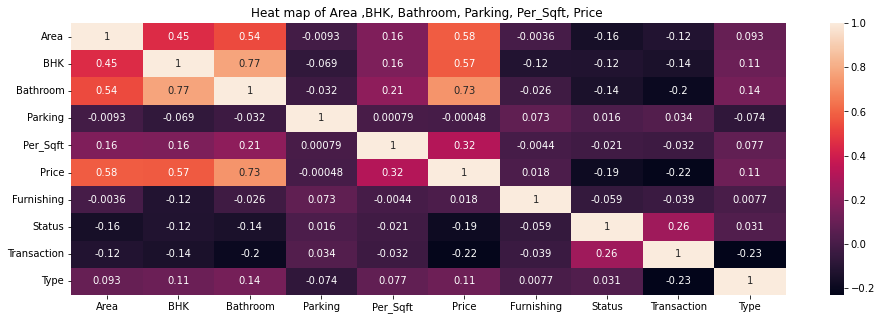

In [81]:
# Ploting a heat map to know the relation b/w price with other column

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,5))
corr = df[["Area","BHK","Bathroom","Parking","Per_Sqft","Price","Furnishing","Status","Transaction","Type"]].corr()
sns.heatmap(corr, annot= True) #we set annot for annotate to true to see the corellation values
plt.title('Heat map of Area ,BHK, Bathroom, Parking, Per_Sqft, Price ')
plt.show()

From this heat map we can see that "area", "BHK", "Bathroom" and "per_Sqrt" have high correlation with price

In [83]:
# spliting of independent and dependent data into x and y respectively
x = df.iloc[:,[0,1,2,9]]
y = df.iloc[:,-1]

In [84]:
x

,Area,BHK,Bathroom,Per_Sqft
0,800.0,3,2.0,15690.136542
1,750.0,2,2.0,6667.000000
2,950.0,2,2.0,6667.000000
3,600.0,2,2.0,6667.000000
4,650.0,2,2.0,6667.000000
...,...,...,...,...
1254,4118.0,4,5.0,12916.000000
1255,1050.0,3,2.0,12916.000000
1256,875.0,3,3.0,12916.000000
1257,990.0,2,2.0,12916.000000


In [97]:
# spliting our data into training and testing data

# #train test spilt method

#test size  = 0.2 means 20%

# x_train ,x_test, y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 1) 

#random_state can be any number 1,2,20,30,...etc
#this is used to give label or name to that state like 80-20 data splitting pattern is fix by giving name "1"

from sklearn.model_selection import train_test_split
x_train , x_test , y_tain, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [89]:
# feature scaling 
# final step :- feature scaling 
# two method 
# 1. standardisation and 2. Normalisation


#if our data have outlier , to find the data outlier use box plot
# never use normalisation if your data have outliers

#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #max limit comes from -3 to +3
x_train.iloc[:,:] = sc.fit_transform(x_train.iloc[:,:])
print(x_train)

          Area       BHK  Bathroom  Per_Sqft
159  -0.609442 -0.861098 -1.496963 -0.600106
769  -0.363615  0.196039 -0.552719 -0.615016
1145  0.189495  0.196039  0.391525  0.009324
1089  0.066582  0.196039  1.335769 -0.258329
1241  0.576673  1.253177  1.335769  0.147101
...        ...       ...       ...       ...
768   0.066582  0.196039  0.391525 -0.615016
840  -0.308304  1.253177  0.391525  0.009324
1221  0.558236  1.253177  2.280012  0.494665
563   0.189495  0.196039  0.391525  0.132609
688   0.128039  0.196039  0.391525  0.124841

[1003 rows x 4 columns]


In [90]:
# standardisation for testing data

x_test.iloc[:,:] = sc.transform(x_test.iloc[:, :])
print(x_test)

          Area       BHK  Bathroom  Per_Sqft
5    -0.117788  1.253177  0.391525 -0.461070
876  -0.677045 -1.918235 -1.496963 -0.541301
52    0.066582  0.196039  0.391525  0.338269
982  -0.179245  0.196039 -0.552719 -0.305300
186   0.066582  1.253177  0.391525 -0.385062
...        ...       ...       ...       ...
869  -0.684420 -1.918235 -0.552719  0.009324
31   -0.425072 -0.861098 -0.552719  0.009324
1209  1.848828  1.253177  2.280012  8.053796
64   -0.271430  0.196039 -0.552719 -0.624921
412  -0.640171 -0.861098 -0.552719 -0.506581

[251 rows x 4 columns]


In [91]:
# build constructor for linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_tain) # fiting the data 

LinearRegression()

In [92]:
# for linear regression the equation is f(x) = mx + c where m is slope and c is intercept
# Now for multiple regression our equation will be f(x) = m1*x1 + m2*x2 + ... + Mn*Xn + b
# where x1, x2, x3 .. are the different features 

print("coffient",regressor.coef_)#slope or m or b1
print("regressor",regressor.intercept_) #y-intercept 

coffient [ 7088221.82999312    29774.0016077  14563402.57007144  4232514.03315894]
regressor 21828614.15752742


In [94]:
# prediction of our x_test data or you can say testing our model
y_pred = regressor.predict(x_test)


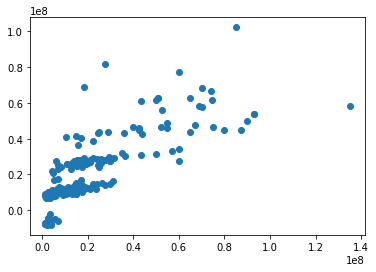

In [103]:
# plotting our y_test, y_pred
plt.scatter(y_test,y_pred)

The clustter(or darker area) you can see in scatter plot, its mean those are region where aur y_test and y_pred are same

In [111]:
# check the r_score for our model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

63.594038681389556

In [115]:
# prediction for random values
y_pred_rand = regressor.predict([[400,3,2,6000]])
print(y_pred_rand)

[2.82814177e+10]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
